### Select the Right Threshold values using ROC Curve

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# for roc curve and auc score
# This 'make_classification' is the most important library
from sklearn.datasets import make_classification

- This `make_classification` is basically a technique of creating a synthetic dataset, where it generates random classification problem.
- This initially creates clusters of points normally distributed (std=1)about vertices of an `n_informative`-dimensional hypercube with sides of length `2*class_sep` and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data.
- Here `n_classes` is to specify how many number of categories we want in the output feature, here we will have `0` and `1` i.e. 2.
- Here we are taking a sample of 2000 data points where the number of classes should be 2 and the weight should be equal, i.e. if one category of data points are 1000 then the other category of data points should also be 1000. So it is a balanced dataset.

In [2]:
# Creating the dataset

from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
# Checking the shape of the data
# So here we are getting 2000 rows with 20 features or columns

X.shape

(2000, 20)

In [4]:
# The number of categories in the output is 2 i.e. '0' and '1'

y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
# Now doing train test split
# Here test size is 30%

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# importing libraries for roc curve and roc_auc score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()

# training the model
log_classifier.fit(X_train, y_train)

# predict_proba() will give us the probability
# Here we consider probability as 0.5 then anything less than this is 0 and anything equal or greater is 1
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


- The higher the area the better model it is that is the performance will be high.
- As here we are getting a 98% for both test and train dataset so we can say this is a very good model.

In [8]:
# To check in training dataset the probability of gettion 0 and 1

log_classifier.predict_proba(X_train)

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [9]:
# Now to get the probability of 1 only we need to take the 1th column only

log_classifier.predict_proba(X_train)[:,1]

array([3.11520635e-04, 3.39995695e-05, 9.79002323e-01, ...,
       1.41536652e-01, 5.77665099e-04, 3.92285965e-01])

#### Now we will focus on selecting the best threshold for maximum accuracy

In [10]:
# Here we are using the roc_auc score along with the log classifier

pred = []

# Here we are taking all the prdictions of all the models and we are appending it
# That is we are doing prediction on the X_test data find all the values where the probabilty of output is 1 
# and then appending all those data as a series to the empty list 'pred'
for model in [log_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

# Doing the final prediction
# Here we are concatinating with respect to all the prdictions we get from different models
# axis=1 is so we concatinate all the values of different models horizontally
# mean(axis=1) so we can find the mean of all these values and provide them in the final prediction
final_prediction = pd.concat(pred, axis=1).mean(axis=1)

print('The test roc-auc: {}'.format(roc_auc_score(y_test, final_prediction)))

The test roc-auc: 0.9885777777777777


In [11]:
# As here we have only one model 

pd.concat(pred, axis=1)

,0
0,0.991861
1,0.000008
2,0.966929
3,0.761539
4,0.779443
...,...
595,0.024239
596,0.000003
597,0.984385
598,0.001147


In [12]:
# getting the final prediction outputs with respect to 1

final_prediction

0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64

In [13]:
# Calculating the ROC Curve
# Here we will get all the thresholds for all the different fpr and tpr


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

In [14]:
# all the different FPRs

fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.01      , 0.01      , 0.01333333,
       0.01333333, 0.01666667, 0.01666667, 0.02      , 0.02      ,
       0.02333333, 0.02333333, 0.03      , 0.03      , 0.03333333,
       0.03333333, 0.03666667, 0.03666667, 0.04      , 0.04      ,
       0.05666667, 0.05666667, 0.06333333, 0.06333333, 0.07666667,
       0.07666667, 0.08      , 0.08      , 0.09      , 0.09      ,
       0.1       , 0.1       , 0.17      , 0.17      , 0.95666667,
       0.95666667, 1.        ])

In [15]:
# all the TPRs

tpr

array([0.        , 0.00333333, 0.11      , 0.11      , 0.65666667,
       0.65666667, 0.81      , 0.81      , 0.83      , 0.83      ,
       0.84333333, 0.84333333, 0.87333333, 0.87333333, 0.93666667,
       0.93666667, 0.95      , 0.95      , 0.95333333, 0.95333333,
       0.96333333, 0.96333333, 0.97      , 0.97      , 0.97333333,
       0.97333333, 0.97666667, 0.97666667, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

In [16]:
# all the Threshold values

thresholds

array([1.99970150e+00, 9.99701500e-01, 9.96158877e-01, 9.96129645e-01,
       9.47070326e-01, 9.46204924e-01, 8.65466258e-01, 8.63536252e-01,
       8.53176377e-01, 8.50056757e-01, 8.41421435e-01, 8.39367909e-01,
       8.15506733e-01, 8.14031083e-01, 7.10421057e-01, 6.95370907e-01,
       6.71015565e-01, 6.37604614e-01, 6.28000190e-01, 6.25419393e-01,
       5.85991638e-01, 5.72811301e-01, 5.44222421e-01, 5.09091565e-01,
       5.05747727e-01, 4.25206094e-01, 4.00497635e-01, 3.57672321e-01,
       3.57418343e-01, 3.08833885e-01, 3.04354181e-01, 2.98609914e-01,
       2.96733938e-01, 2.62534344e-01, 2.58894947e-01, 2.46055520e-01,
       2.13787155e-01, 8.32534990e-02, 8.12384385e-02, 5.22202002e-06,
       4.99437632e-06, 2.17237065e-07])

In [17]:
# Now checking accuracy for each threshold
# We need to find the best threshold on the basis of best accuracy
# y_pred = Whereever the final prediction is greater than threshold make that as 1 else keep it as 0
# Then append all the accuracy scores of the test data on the basis of the prediction we made in 'y_pred'
# Now concatinate the threshold in the form of series along with the accuracy horizontally
# accuracy_ls.columns = giving name to the columns
# Now sort the dataframe in Descending order so we get the highest accuracy at the top

from sklearn.metrics import accuracy_score

accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction>thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)

accuracy_ls.columns = ['thresholds', 'accuracy']

accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

accuracy_ls.head()

,thresholds,accuracy
23,0.509092,0.966667
21,0.572811,0.965000
24,0.505748,0.965000
22,0.544222,0.965000
20,0.585992,0.963333


- On the basis of the accuracy we should select the threshold of `0.509092`.
- We also need to check the FPR and TPR with this threshold.

In [20]:
# Creating the dataframe along with TPR and FPR

from sklearn.metrics import accuracy_score

accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction>thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(tpr), pd.Series(fpr), pd.Series(accuracy_ls)], axis=1)

accuracy_ls.columns = ['thresholds', 'tpr', 'fpr', 'accuracy']

accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

accuracy_ls.head()m

,thresholds,tpr,fpr,accuracy
23,0.509092,0.970000,0.040000,0.966667
21,0.572811,0.963333,0.036667,0.965000
24,0.505748,0.973333,0.040000,0.965000
22,0.544222,0.970000,0.036667,0.965000
20,0.585992,0.963333,0.033333,0.963333


### Drawing the curve

In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

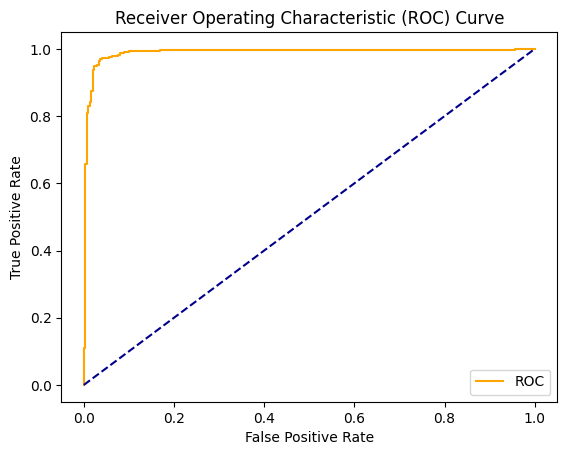

In [19]:
plot_roc_curve(fpr,tpr)

- The ROC Curve should always remain over the dotted line if not the it will be a Dumb Model.

### Assignments:

- **Regression problem**
    - Collect dataset from here https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
    - Here the number of instances is very high, so take a random sample of 50k using the `sample()`.
    - Add all the three columns named `sub_metering_1`, `sub_metering_2` and `sub_metering_3` to get the total energy consumed.
    - Create a Regression model on the basis of attributes.
    - Create `Linear Regression`, `Ridge Regression`, `Lasso Regression`, `ElasticNet Regression`, `Support Vector Regression`.


- **Classification problem**
    - Collect dataset from here https://archive.ics.uci.edu/ml/datasets/census+income
    - Here we have missing values also.
    - So here perform EDA, Data wrangling, Data Pre processing
    - Now make a Classification model to find how many people are `>50k` and how many are `<=50k`.
    - Here create `Logistic Regression`, `SVM`.
    
    

- **Steps to be followed**
    - Data ingestion.
    - EDA (end to end).
    - Preprocessing of the data. While preprocessing save the data after every process like `standard scaling`, `standardization` etc. We have to use this same data when we are doing the evaluation of the model. So save whatever object get created after preprocessing.
    - Store the final processed data inside MongoDB after preprocessing using pickle.
    - Again load the data from MongoDB.
    - Model building.
    - Use `GridSearchCV` for hyper parameter tuning.
    - Evaluation.
        - `R2` and `adjusted R2` for regression model.
        - `Confusion Matrix`, `ROC` and `AUC`.


**Google form link**

https://forms.gle/2PJSSCmL9S865nwe8